<a href="https://colab.research.google.com/github/svetlanama/goit-np-hw-01/blob/main/NP_HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Інсталяція необхідних пакетів
!pip install plotly==5.20.0
!pip install "jupyterlab>=3" "ipywidgets>=7.6"
!pip install scikit-learn pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 101.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.4 MB/s eta 0:00:00


In [3]:
# Імпорт бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.mixture import GaussianMixture
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Налаштування відображення
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Всі бібліотеки успішно імпортовані!")

✓ Всі бібліотеки успішно імпортовані!


In [4]:
# Завантаження даних
!wget -O WorldHappinessReport.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true

--2025-11-09 20:38:03--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/WorldHappinessReport.zip [following]
--2025-11-09 20:38:03--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/WorldHappinessReport.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/WorldHappinessReport.zip [following]
--2025-11-09 20:38:03--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/WorldHappinessReport.zip
Resolving raw.githubusercontent.com (raw.githubuserco

In [5]:
# Розпакування архіву
!unzip -o WorldHappinessReport.zip

# Перевірка файлів
!ls -lh *.csv

Archive:  WorldHappinessReport.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
-rw-r--r-- 1 root root  17K Nov 27  2019 2015.csv
-rw-r--r-- 1 root root  17K Nov 27  2019 2016.csv
-rw-r--r-- 1 root root  29K Nov 27  2019 2017.csv
-rw-r--r-- 1 root root 8.7K Nov 27  2019 2018.csv
-rw-r--r-- 1 root root 8.7K Nov 27  2019 2019.csv


Крок 4: Читання та аналіз даних

In [6]:
# Читання даних (використовуємо дані 2017 року)
df_2017 = pd.read_csv('2017.csv')

print("=" * 80)
print("ЗАГАЛЬНА ІНФОРМАЦІЯ ПРО ДАТАСЕТ")
print("=" * 80)
print(f"\nРозмір датасету: {df_2017.shape[0]} рядків, {df_2017.shape[1]} колонок\n")

# Перші рядки
print("\nПерші 5 рядків датасету:")
display(df_2017.head())

# Інформація про типи даних
print("\n" + "=" * 80)
print("ІНФОРМАЦІЯ ПРО ТИПИ ДАНИХ")
print("=" * 80)
df_2017.info()

# Статистики
print("\n" + "=" * 80)
print("СТАТИСТИЧНІ ХАРАКТЕРИСТИКИ")
print("=" * 80)
display(df_2017.describe())

# Перевірка на пропущені значення
print("\n" + "=" * 80)
print("ПРОПУЩЕНІ ЗНАЧЕННЯ")
print("=" * 80)
missing = df_2017.isnull().sum()
if missing.sum() == 0:
    print("✓ Пропущених значень немає!")
else:
    print(missing[missing > 0])

ЗАГАЛЬНА ІНФОРМАЦІЯ ПРО ДАТАСЕТ

Розмір датасету: 155 рядків, 12 колонок


Перші 5 рядків датасету:


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182



ІНФОРМАЦІЯ ПРО ТИПИ ДАНИХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485



ПРОПУЩЕНІ ЗНАЧЕННЯ
✓ Пропущених значень немає!


Крок 5: Аналіз розподілу числових ознак

Числові ознаки: ['Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']



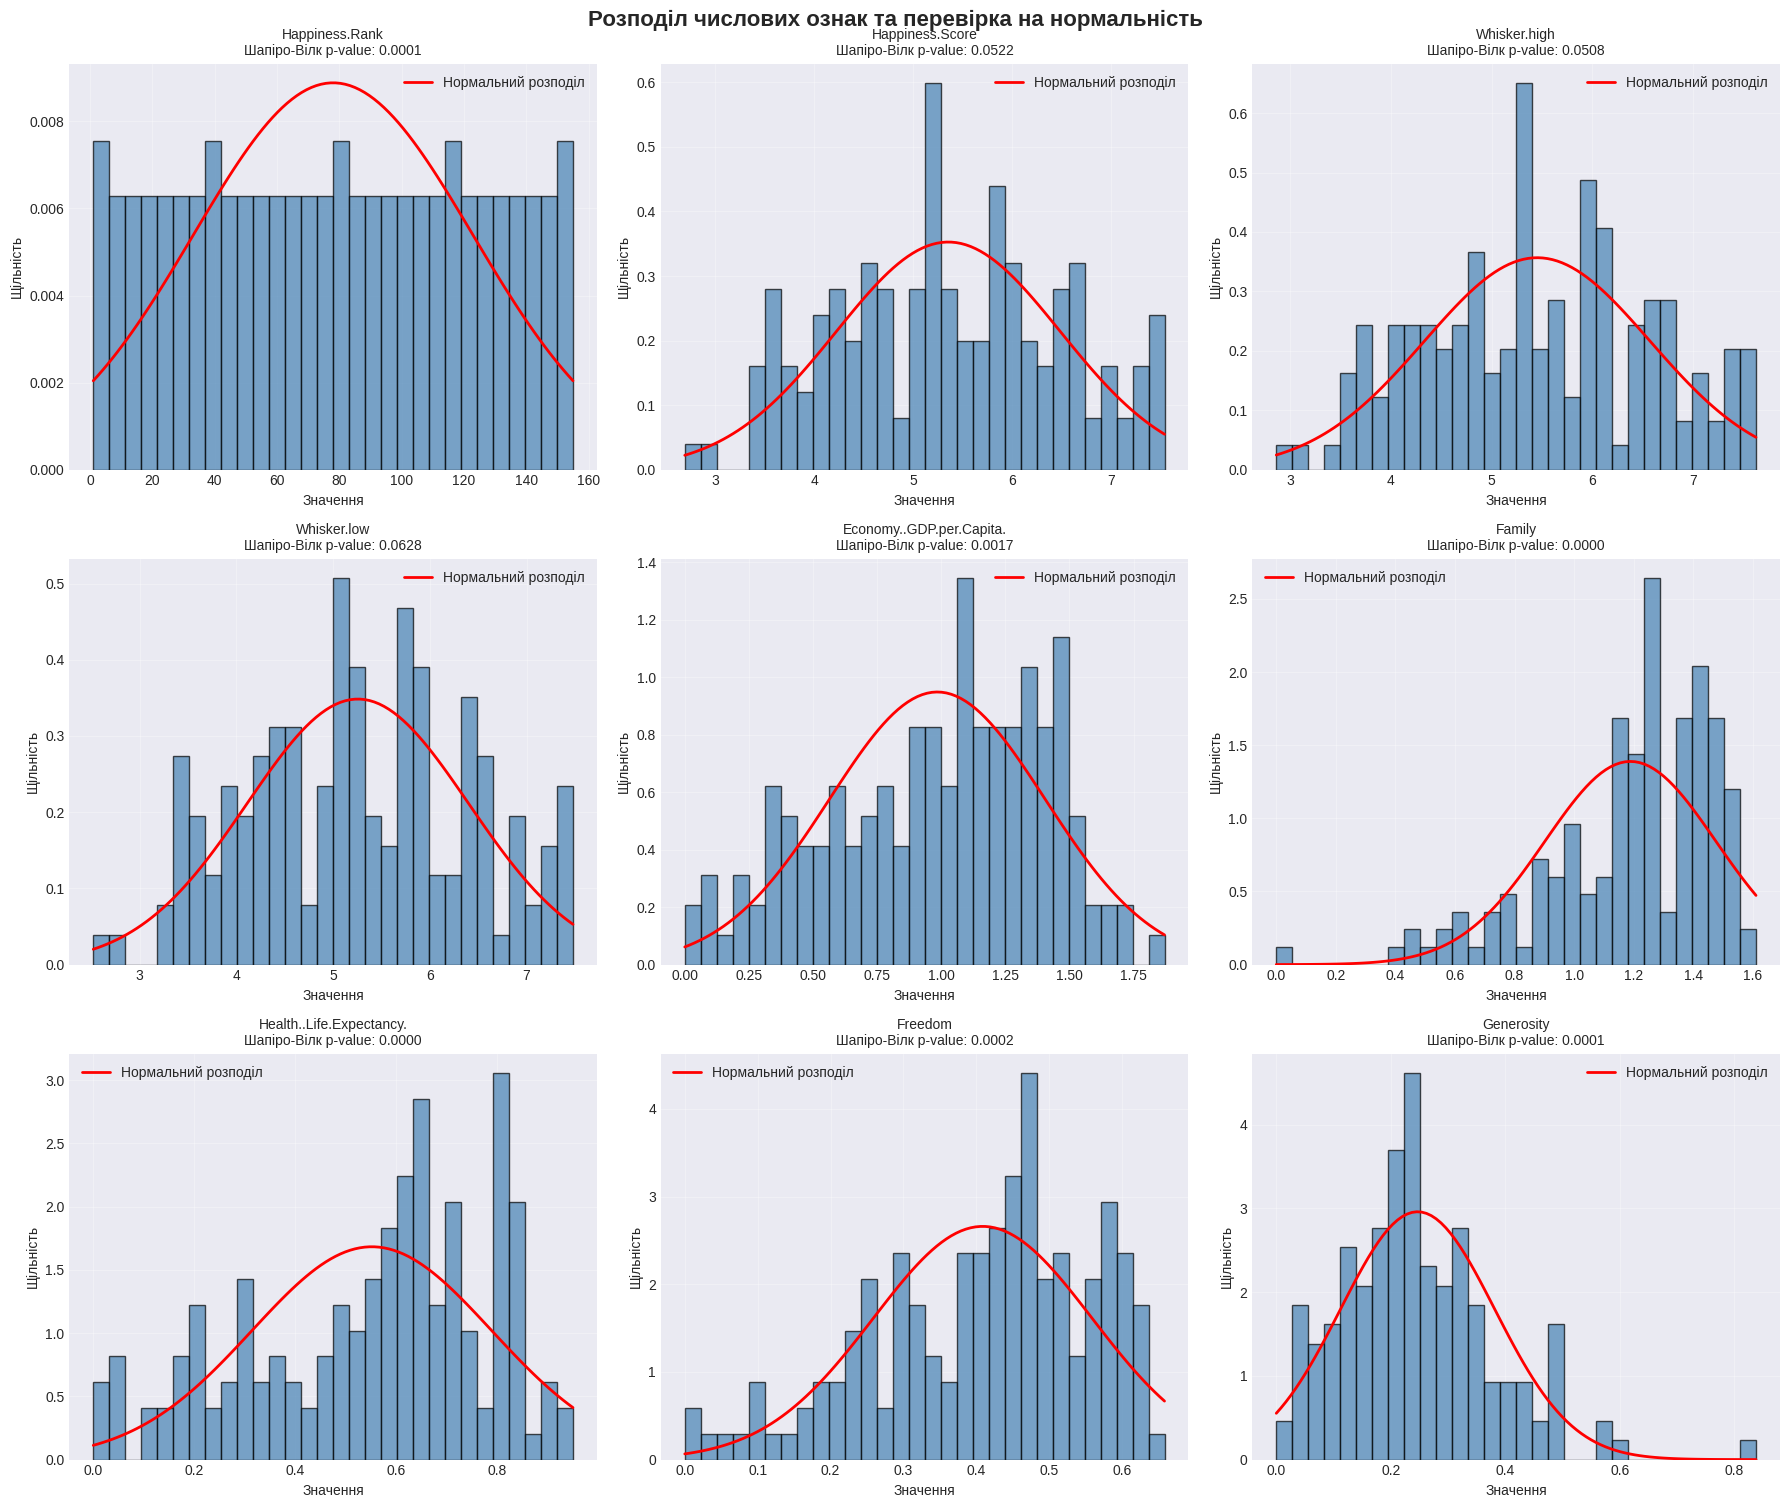


АНАЛІЗ НОРМАЛЬНОСТІ РОЗПОДІЛУ (Тест Шапіро-Вілка)
p-value > 0.05 → розподіл ВІДПОВІДАЄ нормальному
p-value < 0.05 → розподіл НЕ ВІДПОВІДАЄ нормальному

Happiness.Rank                     : p-value = 0.000061  ✗ НЕ ВІДПОВІДАЄ
Happiness.Score                    : p-value = 0.052227  ✓ ВІДПОВІДАЄ
Whisker.high                       : p-value = 0.050755  ✓ ВІДПОВІДАЄ
Whisker.low                        : p-value = 0.062793  ✓ ВІДПОВІДАЄ
Economy..GDP.per.Capita.           : p-value = 0.001750  ✗ НЕ ВІДПОВІДАЄ
Family                             : p-value = 0.000000  ✗ НЕ ВІДПОВІДАЄ
Health..Life.Expectancy.           : p-value = 0.000011  ✗ НЕ ВІДПОВІДАЄ
Freedom                            : p-value = 0.000167  ✗ НЕ ВІДПОВІДАЄ
Generosity                         : p-value = 0.000118  ✗ НЕ ВІДПОВІДАЄ
Trust..Government.Corruption.      : p-value = 0.000000  ✗ НЕ ВІДПОВІДАЄ
Dystopia.Residual                  : p-value = 0.033413  ✗ НЕ ВІДПОВІДАЄ


In [7]:
# Виділяємо числові колонки (виключаємо Country)
numeric_columns = df_2017.select_dtypes(include=[np.number]).columns.tolist()

print(f"Числові ознаки: {numeric_columns}\n")

# Побудова гістограм для всіх числових ознак
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    if idx < len(axes):
        # Гістограма з KDE
        axes[idx].hist(df_2017[col], bins=30, alpha=0.7, color='steelblue', edgecolor='black', density=True)

        # Додаємо криву нормального розподілу
        mu, sigma = df_2017[col].mean(), df_2017[col].std()
        x = np.linspace(df_2017[col].min(), df_2017[col].max(), 100)
        axes[idx].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Нормальний розподіл')

        # Тест Шапіро-Вілка на нормальність
        statistic, p_value = stats.shapiro(df_2017[col])

        axes[idx].set_title(f'{col}\nШапіро-Вілк p-value: {p_value:.4f}', fontsize=10)
        axes[idx].set_xlabel('Значення')
        axes[idx].set_ylabel('Щільність')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

# Видаляємо зайві підграфіки
for idx in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.suptitle('Розподіл числових ознак та перевірка на нормальність', y=1.002, fontsize=16, fontweight='bold')
plt.show()

# Висновки про нормальність
print("\n" + "=" * 80)
print("АНАЛІЗ НОРМАЛЬНОСТІ РОЗПОДІЛУ (Тест Шапіро-Вілка)")
print("=" * 80)
print("p-value > 0.05 → розподіл ВІДПОВІДАЄ нормальному")
print("p-value < 0.05 → розподіл НЕ ВІДПОВІДАЄ нормальному\n")

for col in numeric_columns:
    statistic, p_value = stats.shapiro(df_2017[col])
    result = "✓ ВІДПОВІДАЄ" if p_value > 0.05 else "✗ НЕ ВІДПОВІДАЄ"
    print(f"{col:35s}: p-value = {p_value:.6f}  {result}")

Крок 6: Відбір ознак та побудова кореляційної матриці

Відібрані ознаки (8): ['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']



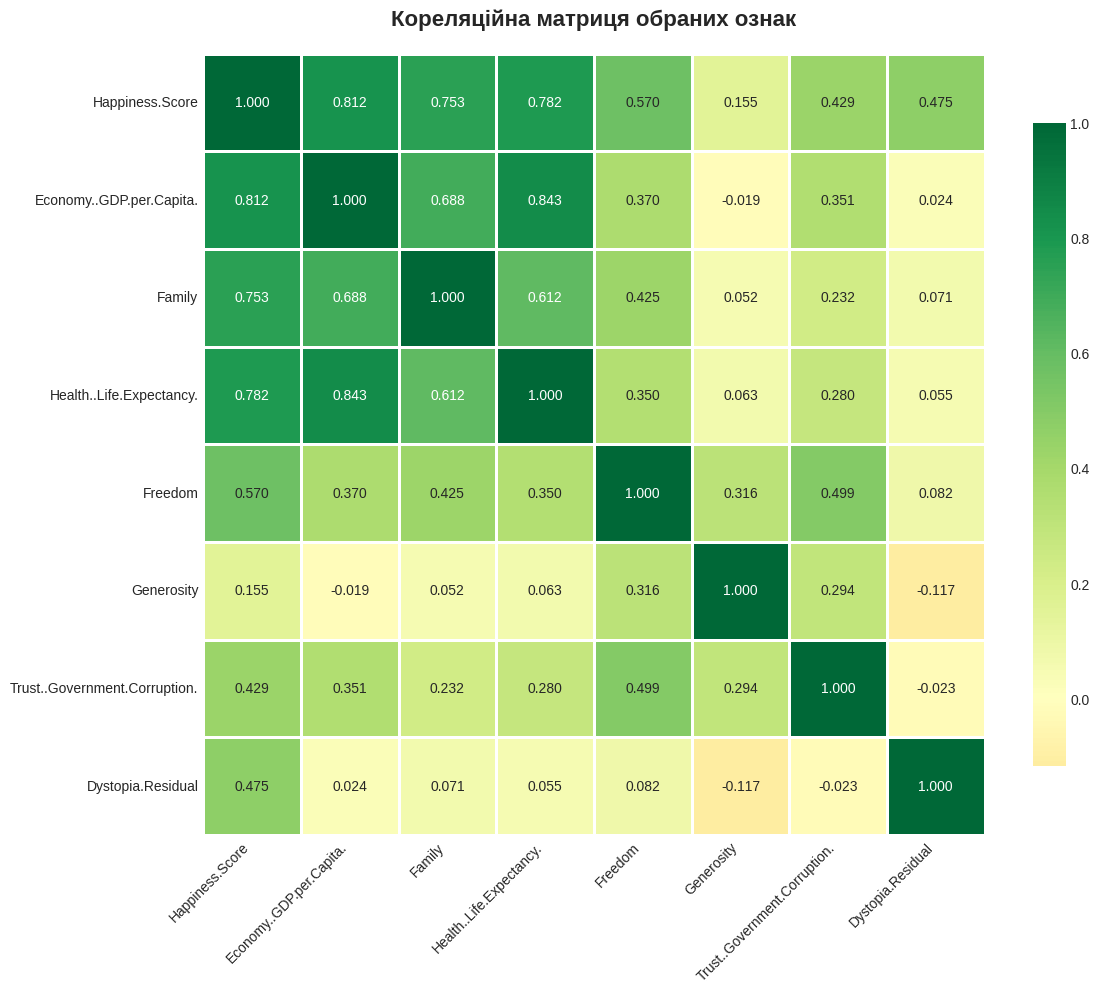


КОРЕЛЯЦІЙНА МАТРИЦЯ


,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Score,1.000000,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Economy..GDP.per.Capita.,0.812469,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,0.752737,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,0.781951,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,0.570137,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,0.155256,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,0.429080,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755
Dystopia.Residual,0.475355,0.024226,0.070506,0.054963,0.081926,-0.116627,-0.022755,1.000000


In [8]:
# Відбираємо найважливіші числові ознаки для аналізу
selected_features = [
    'Happiness.Score',
    'Economy..GDP.per.Capita.',
    'Family',
    'Health..Life.Expectancy.',
    'Freedom',
    'Generosity',
    'Trust..Government.Corruption.',
    'Dystopia.Residual'
]

# Перевірка наявності колонок
available_features = [f for f in selected_features if f in df_2017.columns]
print(f"Відібрані ознаки ({len(available_features)}): {available_features}\n")

# Створюємо датафрейм з відібраними ознаками
df_selected = df_2017[available_features]

# Обчислюємо кореляційну матрицю
correlation_matrix = df_selected.corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.3f',
            cmap='RdYlGn',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('Кореляційна матриця обраних ознак', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Виводимо кореляційну матрицю
print("\n" + "=" * 80)
print("КОРЕЛЯЦІЙНА МАТРИЦЯ")
print("=" * 80)
display(correlation_matrix.style.background_gradient(cmap='RdYlGn', axis=None))

Крок 7: Аналіз кореляцій та висновки

In [9]:
print("=" * 80)
print("АНАЛІЗ ЛІНІЙНОГО ЗВ'ЯЗКУ МІЖ ОЗНАКАМИ")
print("=" * 80)
print("\nІнтерпретація коефіцієнта кореляції:")
print("  |r| = 0.00 - 0.30  →  Слабкий зв'язок")
print("  |r| = 0.30 - 0.70  →  Помірний зв'язок")
print("  |r| = 0.70 - 1.00  →  Сильний зв'язок")
print("\n" + "=" * 80)

# Знаходимо найсильніші кореляції з Happiness.Score
happiness_corr = correlation_matrix['Happiness.Score'].drop('Happiness.Score').sort_values(ascending=False)

print("\n📊 КОРЕЛЯЦІЯ З HAPPINESS.SCORE:")
print("=" * 80)
for feature, corr_value in happiness_corr.items():
    if abs(corr_value) >= 0.7:
        strength = "СИЛЬНИЙ"
        icon = "🔴"
    elif abs(corr_value) >= 0.3:
        strength = "ПОМІРНИЙ"
        icon = "🟡"
    else:
        strength = "СЛАБКИЙ"
        icon = "🟢"

    print(f"{icon} {feature:40s}: {corr_value:+.3f}  ({strength})")

# Знаходимо всі сильні кореляції (|r| > 0.7)
print("\n" + "=" * 80)
print("🔍 ВСІ СИЛЬНІ КОРЕЛЯЦІЇ (|r| > 0.7):")
print("=" * 80)

strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if strong_correlations:
    for feat1, feat2, corr_val in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
        print(f"  {feat1} ↔ {feat2}")
        print(f"    Кореляція: {corr_val:+.3f}\n")
else:
    print("  Сильних кореляцій не знайдено (окрім Happiness.Score)")

# Загальні висновки
print("\n" + "=" * 80)
print("📝 ВИСНОВКИ:")
print("=" * 80)
print("""
1. Найсильніший вплив на рівень щастя (Happiness.Score) мають:
   - Economy (GDP per Capita) - економічний добробут
   - Health (Life Expectancy) - здоров'я та тривалість життя
   - Family - сімейні зв'язки

2. Між економічними показниками та здоров'ям населення спостерігається
   сильна позитивна кореляція, що вказує на взаємозв'язок матеріального
   добробуту та якості життя.

3. Dystopia.Residual має слабку або негативну кореляцію з іншими факторами,
   що є очікуваним, оскільки це залишкова складова.
""")

АНАЛІЗ ЛІНІЙНОГО ЗВ'ЯЗКУ МІЖ ОЗНАКАМИ

Інтерпретація коефіцієнта кореляції:
  |r| = 0.00 - 0.30  →  Слабкий зв'язок
  |r| = 0.30 - 0.70  →  Помірний зв'язок
  |r| = 0.70 - 1.00  →  Сильний зв'язок


📊 КОРЕЛЯЦІЯ З HAPPINESS.SCORE:
🔴 Economy..GDP.per.Capita.                : +0.812  (СИЛЬНИЙ)
🔴 Health..Life.Expectancy.                : +0.782  (СИЛЬНИЙ)
🔴 Family                                  : +0.753  (СИЛЬНИЙ)
🟡 Freedom                                 : +0.570  (ПОМІРНИЙ)
🟡 Dystopia.Residual                       : +0.475  (ПОМІРНИЙ)
🟡 Trust..Government.Corruption.           : +0.429  (ПОМІРНИЙ)
🟢 Generosity                              : +0.155  (СЛАБКИЙ)

🔍 ВСІ СИЛЬНІ КОРЕЛЯЦІЇ (|r| > 0.7):
  Economy..GDP.per.Capita. ↔ Health..Life.Expectancy.
    Кореляція: +0.843

  Happiness.Score ↔ Economy..GDP.per.Capita.
    Кореляція: +0.812

  Happiness.Score ↔ Health..Life.Expectancy.
    Кореляція: +0.782

  Happiness.Score ↔ Family
    Кореляція: +0.753


📝 ВИСНОВКИ:

1. Найсильніший впл

Крок 8: Візуалізація розподілу щастя за країнами

In [10]:
# Теплова мапа світового індексу щастя
fig = px.choropleth(df_2017,
                    locations="Country",
                    color="Happiness.Score",
                    locationmode="country names",
                    color_continuous_scale="RdYlGn",
                    hover_name="Country",
                    hover_data={
                        'Happiness.Score': ':.2f',
                        'Happiness.Rank': True,
                        'Economy..GDP.per.Capita.': ':.3f',
                        'Family': ':.3f'
                    },
                    labels={'Happiness.Score': 'Індекс щастя'})

fig.update_layout(
    title={
        'text': "Індекс щастя країн світу - 2017",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black'}
    },
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    height=600,
    width=1200
)

fig.show()

# Топ-10 найщасливіших країн
print("\n" + "=" * 80)
print("🏆 ТОП-10 НАЙЩАСЛИВІШИХ КРАЇН")
print("=" * 80)
top_10 = df_2017.nsmallest(10, 'Happiness.Rank')[['Country', 'Happiness.Rank', 'Happiness.Score']]
display(top_10)

# Топ-10 найменш щасливих країн
print("\n" + "=" * 80)
print("📉 ТОП-10 НАЙМЕНШ ЩАСЛИВИХ КРАЇН")
print("=" * 80)
bottom_10 = df_2017.nlargest(10, 'Happiness.Rank')[['Country', 'Happiness.Rank', 'Happiness.Score']]
display(bottom_10)


🏆 ТОП-10 НАЙЩАСЛИВІШИХ КРАЇН


,Country,Happiness.Rank,Happiness.Score
0,Norway,1,7.537
1,Denmark,2,7.522
2,Iceland,3,7.504
3,Switzerland,4,7.494
4,Finland,5,7.469
5,Netherlands,6,7.377
6,Canada,7,7.316
7,New Zealand,8,7.314
8,Sweden,9,7.284
9,Australia,10,7.284



📉 ТОП-10 НАЙМЕНШ ЩАСЛИВИХ КРАЇН


,Country,Happiness.Rank,Happiness.Score
154,Central African Republic,155,2.693
153,Burundi,154,2.905
152,Tanzania,153,3.349
151,Syria,152,3.462
150,Rwanda,151,3.471
149,Togo,150,3.495
148,Guinea,149,3.507
147,Liberia,148,3.533
146,South Sudan,147,3.591
145,Yemen,146,3.593


Крок 9: Стандартизація даних

In [11]:
# Функція для стандартизації даних
def data_scale(data, scaler_type='minmax'):
    """
    Стандартизує дані за допомогою обраного методу.

    Параметри:
    - data: pandas DataFrame або numpy array
    - scaler_type: 'minmax', 'std', або 'norm'

    Повертає:
    - res: стандартизовані дані (numpy array)
    """
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
        print("Використовується MinMaxScaler (нормалізація в діапазон [0, 1])")
    elif scaler_type == 'std':
        scaler = StandardScaler()
        print("Використовується StandardScaler (стандартизація: μ=0, σ=1)")
    elif scaler_type == 'norm':
        scaler = Normalizer()
        print("Використовується Normalizer (нормалізація векторів)")
    else:
        raise ValueError("scaler_type має бути 'minmax', 'std' або 'norm'")

    scaler.fit(data)
    res = scaler.transform(data)
    return res

# Підготовка даних для стандартизації
features_for_scaling = [f for f in available_features if f != 'Happiness.Score']
original_dataframe = df_2017[features_for_scaling].copy()

print("\n" + "=" * 80)
print("ОРИГІНАЛЬНІ ДАНІ")
print("=" * 80)
print(f"\nОзнаки для стандартизації: {features_for_scaling}\n")
display(original_dataframe.head())

# Застосовуємо різні методи стандартизації
print("\n" + "=" * 80)
print("ЗАСТОСУВАННЯ СТАНДАРТИЗАЦІЇ")
print("=" * 80 + "\n")

# MinMax Scaler
print("\n1️⃣ MinMax Scaling:")
print("-" * 80)
data_scaled_minmax = data_scale(original_dataframe, scaler_type='minmax')
df_scaled_minmax = pd.DataFrame(data_scaled_minmax, columns=features_for_scaling)
display(df_scaled_minmax.head())

# Standard Scaler
print("\n2️⃣ Standard Scaling:")
print("-" * 80)
data_scaled_std = data_scale(original_dataframe, scaler_type='std')
df_scaled_std = pd.DataFrame(data_scaled_std, columns=features_for_scaling)
display(df_scaled_std.head())

# Normalizer
print("\n3️⃣ Normalization:")
print("-" * 80)
data_scaled_norm = data_scale(original_dataframe, scaler_type='norm')
df_scaled_norm = pd.DataFrame(data_scaled_norm, columns=features_for_scaling)
display(df_scaled_norm.head())

# Для подальшого аналізу використовуємо StandardScaler
df_scaled = df_scaled_std.copy()


ОРИГІНАЛЬНІ ДАНІ

Ознаки для стандартизації: ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']



,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182



ЗАСТОСУВАННЯ СТАНДАРТИЗАЦІЇ


1️⃣ MinMax Scaling:
--------------------------------------------------------------------------------
Використовується MinMaxScaler (нормалізація в діапазон [0, 1])


,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0.864065,0.952160,0.839045,0.965323,0.431957,0.680505,0.693215
1,0.792394,0.963086,0.834726,0.951019,0.423924,0.863156,0.706605
2,0.791458,1.000000,0.877892,0.952775,0.567420,0.330657,0.709893
3,0.836545,0.941845,0.903779,0.942001,0.346686,0.790440,0.693102
4,0.771648,0.956334,0.852200,0.938780,0.292913,0.824047,0.749120



2️⃣ Standard Scaling:
--------------------------------------------------------------------------------
Використовується StandardScaler (стандартизація: μ=0, σ=1)


,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1.506188,1.203577,1.038167,1.515836,0.856964,1.903084,0.856296
1,1.186518,1.265036,1.020812,1.452859,0.806856,2.739998,0.929891
2,1.182345,1.472669,1.194259,1.460590,1.702013,0.300066,0.947964
3,1.383442,1.145561,1.298272,1.413155,0.325028,2.406809,0.855673
4,1.093985,1.227057,1.091026,1.398978,-0.010426,2.560800,1.163581



3️⃣ Normalization:
--------------------------------------------------------------------------------
Використовується Normalizer (нормалізація векторів)


,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0.478360,0.453816,0.235758,0.188041,0.107130,0.093503,0.673841
1,0.441695,0.462177,0.236155,0.186527,0.105860,0.119415,0.689399
2,0.436253,0.474539,0.245597,0.184787,0.140113,0.045235,0.684364
3,0.466098,0.451782,0.255577,0.184676,0.086534,0.109306,0.678075
4,0.423751,0.452129,0.237523,0.181395,0.072060,0.112313,0.713363


Крок 10: Порівняння статистик

ПОРІВНЯННЯ СТАТИСТИК

📊 ОРИГІНАЛЬНІ ДАНІ:


,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485



📊 ПІСЛЯ MINMAX SCALING [0, 1]:


,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.526372,0.738183,0.580669,0.621021,0.294584,0.265169,0.537429
std,0.224931,0.178361,0.249684,0.227873,0.160821,0.218951,0.182521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354599,0.647369,0.389541,0.461341,0.183881,0.123346,0.442908
50%,0.569060,0.778553,0.638280,0.664573,0.276274,0.193509,0.531104
75%,0.704539,0.878144,0.761467,0.784751,0.386317,0.330161,0.644897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



📊 ПІСЛЯ STANDARD SCALING (Z-score):


,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02,1.550000e+02
mean,-2.750488e-16,3.667317e-16,-2.292073e-16,2.750488e-16,1.203339e-16,-9.168293e-17,1.375244e-16
std,1.003241e+00,1.003241e+00,1.003241e+00,1.003241e+00,1.003241e+00,1.003241e+00,1.003241e+00
min,-2.347736e+00,-4.152125e+00,-2.333157e+00,-2.734123e+00,-1.837684e+00,-1.215016e+00,-2.954026e+00
25%,-7.661470e-01,-5.108107e-01,-7.679616e-01,-7.030094e-01,-6.905907e-01,-6.498388e-01,-5.195420e-01
50%,1.903992e-01,2.270763e-01,2.314821e-01,1.917450e-01,-1.142208e-01,-3.283529e-01,-3.476633e-02
75%,7.946657e-01,7.872534e-01,7.264573e-01,7.208448e-01,5.722497e-01,2.977939e-01,5.907072e-01
max,2.112488e+00,1.472669e+00,1.684893e+00,1.668506e+00,4.400552e+00,3.367022e+00,2.542565e+00


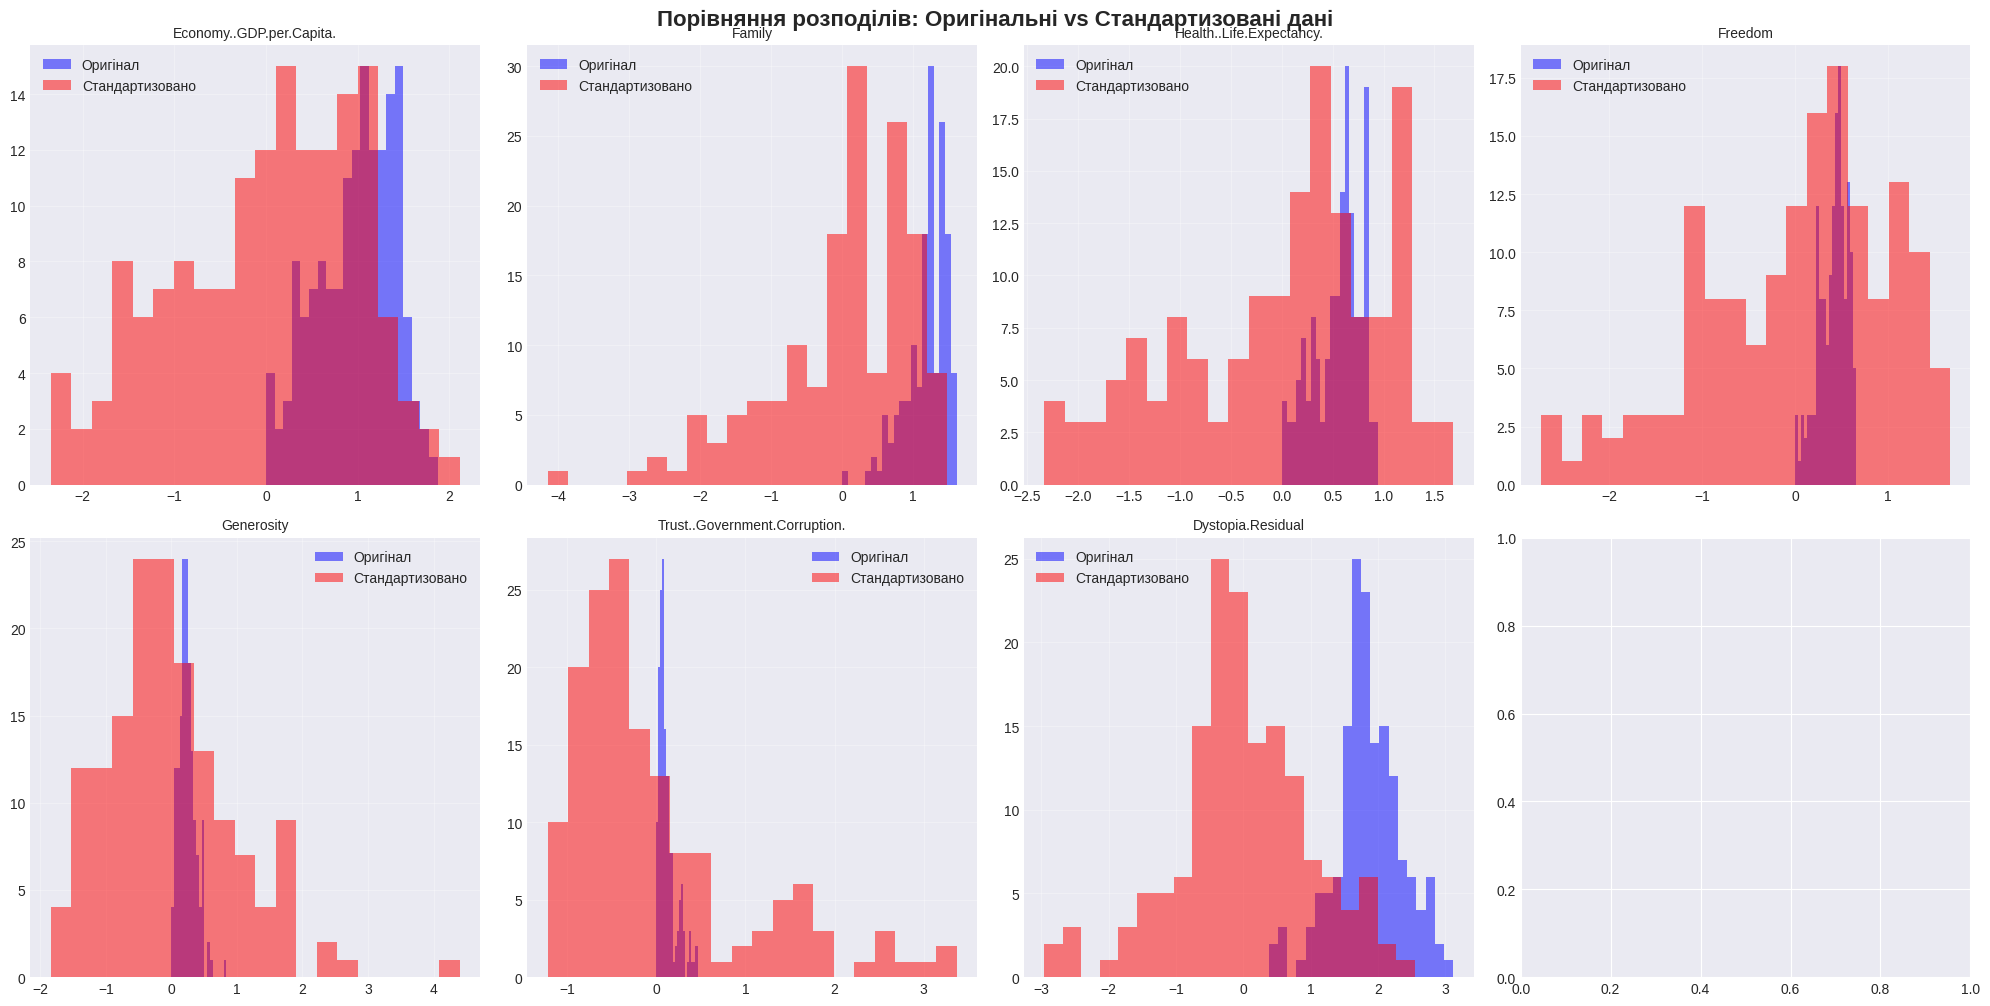


📝 ВИСНОВКИ:

1. MinMax Scaling:
   ✓ Всі значення приведені до діапазону [0, 1]
   ✓ Зберігає форму оригінального розподілу
   ✓ Чутливий до викидів (outliers)

2. Standard Scaling (Z-score):
   ✓ Середнє значення ≈ 0, стандартне відхилення ≈ 1
   ✓ Зберігає форму розподілу
   ✓ Менш чутливий до викидів ніж MinMax
   ✓ РЕКОМЕНДОВАНИЙ для алгоритмів кластеризації

3. Normalization:
   ✓ Нормалізує кожен зразок (рядок) до одиничної норми
   ✓ Використовується коли важлива відносна величина ознак

4. Важливість стандартизації:
   ✓ Усуває вплив масштабу ознак
   ✓ Покращує збіжність алгоритмів
   ✓ Необхідна для методів, що використовують відстані (кластеризація, KNN)



In [12]:
print("=" * 80)
print("ПОРІВНЯННЯ СТАТИСТИК")
print("=" * 80)

# Оригінальні статистики
print("\n📊 ОРИГІНАЛЬНІ ДАНІ:")
print("=" * 80)
display(original_dataframe.describe())

# Статистики після MinMax scaling
print("\n📊 ПІСЛЯ MINMAX SCALING [0, 1]:")
print("=" * 80)
display(df_scaled_minmax.describe())

# Статистики після Standard scaling
print("\n📊 ПІСЛЯ STANDARD SCALING (Z-score):")
print("=" * 80)
display(df_scaled_std.describe())

# Візуалізація порівняння розподілів
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(features_for_scaling):
    if idx < len(axes):
        axes[idx].hist(original_dataframe[col], bins=20, alpha=0.5, label='Оригінал', color='blue')
        axes[idx].hist(df_scaled_std[col], bins=20, alpha=0.5, label='Стандартизовано', color='red')
        axes[idx].set_title(col, fontsize=10)
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Порівняння розподілів: Оригінальні vs Стандартизовані дані',
             y=1.002, fontsize=16, fontweight='bold')
plt.show()

# Висновки
print("\n" + "=" * 80)
print("📝 ВИСНОВКИ:")
print("=" * 80)
print("""
1. MinMax Scaling:
   ✓ Всі значення приведені до діапазону [0, 1]
   ✓ Зберігає форму оригінального розподілу
   ✓ Чутливий до викидів (outliers)

2. Standard Scaling (Z-score):
   ✓ Середнє значення ≈ 0, стандартне відхилення ≈ 1
   ✓ Зберігає форму розподілу
   ✓ Менш чутливий до викидів ніж MinMax
   ✓ РЕКОМЕНДОВАНИЙ для алгоритмів кластеризації

3. Normalization:
   ✓ Нормалізує кожен зразок (рядок) до одиничної норми
   ✓ Використовується коли важлива відносна величина ознак

4. Важливість стандартизації:
   ✓ Усуває вплив масштабу ознак
   ✓ Покращує збіжність алгоритмів
   ✓ Необхідна для методів, що використовують відстані (кластеризація, KNN)
""")

Крок 11: Побудова моделі кластеризації GaussianMixture

КЛАСТЕРИЗАЦІЯ GAUSSIAN MIXTURE MODEL

🔍 Пошук оптимальної кількості кластерів...

n_components=2: BIC=2774.50, AIC=2558.42
n_components=3: BIC=2835.80, AIC=2510.15
n_components=4: BIC=2916.09, AIC=2480.88
n_components=5: BIC=3011.77, AIC=2467.00
n_components=6: BIC=2996.09, AIC=2341.75
n_components=7: BIC=3117.01, AIC=2353.11
n_components=8: BIC=3240.27, AIC=2366.81
n_components=9: BIC=3283.13, AIC=2300.11
n_components=10: BIC=3234.58, AIC=2141.99


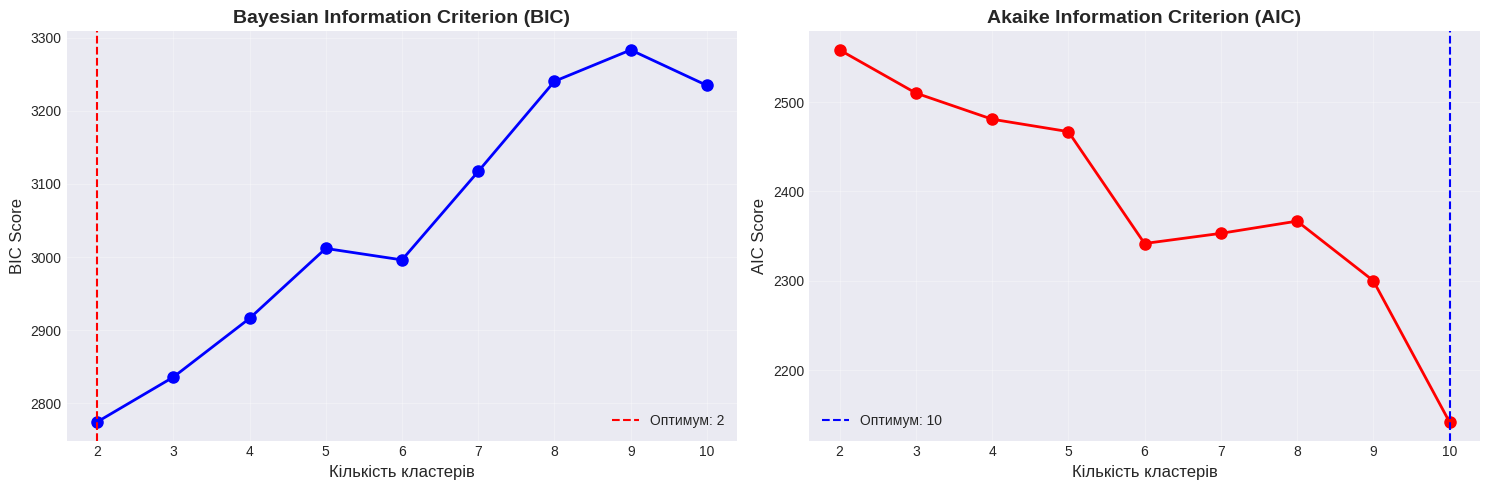


✓ Оптимальна кількість кластерів: 2

🔧 Побудова GMM моделі з 2 кластерами...

✓ Кластеризація завершена!

Розподіл країн по кластерах:
Cluster
0     35
1    120
Name: count, dtype: int64

СТАТИСТИКА ПО КЛАСТЕРАХ

📊 КЛАСТЕР 0:
  Кількість країн: 35
  Середній Happiness Score: 6.765
  Діапазон Happiness Score: [5.472, 7.537]
  Приклади країн: Norway, Denmark, Iceland, Switzerland, Finland

📊 КЛАСТЕР 1:
  Кількість країн: 120
  Середній Happiness Score: 4.942
  Діапазон Happiness Score: [2.693, 7.213]
  Приклади країн: Israel, Chile, Mexico, Guatemala, Thailand


In [13]:
print("=" * 80)
print("КЛАСТЕРИЗАЦІЯ GAUSSIAN MIXTURE MODEL")
print("=" * 80)

# Визначення оптимальної кількості кластерів за допомогою BIC та AIC
n_components_range = range(2, 11)
bic_scores = []
aic_scores = []

print("\n🔍 Пошук оптимальної кількості кластерів...\n")

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42, n_init=10)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))
    aic_scores.append(gmm.aic(df_scaled))
    print(f"n_components={n}: BIC={gmm.bic(df_scaled):.2f}, AIC={gmm.aic(df_scaled):.2f}")

# Візуалізація BIC та AIC
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(n_components_range, bic_scores, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Кількість кластерів', fontsize=12)
ax1.set_ylabel('BIC Score', fontsize=12)
ax1.set_title('Bayesian Information Criterion (BIC)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
optimal_bic = n_components_range[np.argmin(bic_scores)]
ax1.axvline(x=optimal_bic, color='r', linestyle='--', label=f'Оптимум: {optimal_bic}')
ax1.legend()

ax2.plot(n_components_range, aic_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Кількість кластерів', fontsize=12)
ax2.set_ylabel('AIC Score', fontsize=12)
ax2.set_title('Akaike Information Criterion (AIC)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
optimal_aic = n_components_range[np.argmin(aic_scores)]
ax2.axvline(x=optimal_aic, color='b', linestyle='--', label=f'Оптимум: {optimal_aic}')
ax2.legend()

plt.tight_layout()
plt.show()

# Вибираємо оптимальну кількість кластерів
optimal_n_clusters = optimal_bic
print(f"\n✓ Оптимальна кількість кластерів: {optimal_n_clusters}")

# Побудова фінальної моделі
print(f"\n🔧 Побудова GMM моделі з {optimal_n_clusters} кластерами...")
gmm_final = GaussianMixture(n_components=optimal_n_clusters,
                            random_state=42,
                            n_init=10,
                            covariance_type='full')
gmm_final.fit(df_scaled)

# Отримання міток кластерів
cluster_labels = gmm_final.predict(df_scaled)
probabilities = gmm_final.predict_proba(df_scaled)

# Додаємо мітки кластерів до оригінального датафрейму
df_2017['Cluster'] = cluster_labels
df_2017['Cluster_Probability'] = probabilities.max(axis=1)

print("\n✓ Кластеризація завершена!")
print(f"\nРозподіл країн по кластерах:")
print(df_2017['Cluster'].value_counts().sort_index())

# Статистика по кластерах
print("\n" + "=" * 80)
print("СТАТИСТИКА ПО КЛАСТЕРАХ")
print("=" * 80)

for cluster in range(optimal_n_clusters):
    cluster_data = df_2017[df_2017['Cluster'] == cluster]
    print(f"\n📊 КЛАСТЕР {cluster}:")
    print(f"  Кількість країн: {len(cluster_data)}")
    print(f"  Середній Happiness Score: {cluster_data['Happiness.Score'].mean():.3f}")
    print(f"  Діапазон Happiness Score: [{cluster_data['Happiness.Score'].min():.3f}, {cluster_data['Happiness.Score'].max():.3f}]")
    print(f"  Приклади країн: {', '.join(cluster_data['Country'].head(5).tolist())}")

Крок 12: Теплова мапа розподілу країн за кластерами


ВІЗУАЛІЗАЦІЯ ХАРАКТЕРИСТИК КЛАСТЕРІВ


<Figure size 1200x600 with 0 Axes>

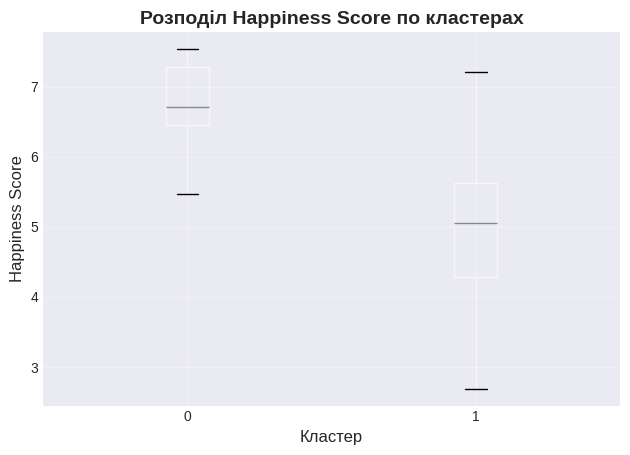

In [14]:
# Створюємо теплову мапу з кластерами
fig = px.choropleth(df_2017,
                    locations="Country",
                    color="Cluster",
                    locationmode="country names",
                    color_continuous_scale="Viridis",
                    hover_name="Country",
                    hover_data={
                        'Cluster': True,
                        'Happiness.Score': ':.2f',
                        'Cluster_Probability': ':.3f',
                        'Economy..GDP.per.Capita.': ':.3f'
                    },
                    labels={'Cluster': 'Номер кластера'})

fig.update_layout(
    title={
        'text': f"Розподіл країн за кластерами (GMM, n={optimal_n_clusters})",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black'}
    },
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    height=600,
    width=1200
)

fig.show()

# Додаткова візуалізація - паралельні координати
print("\n" + "=" * 80)
print("ВІЗУАЛІЗАЦІЯ ХАРАКТЕРИСТИК КЛАСТЕРІВ")
print("=" * 80)

# Підготовка даних для паралельних координат
df_for_viz = df_2017[['Country', 'Cluster', 'Happiness.Score'] + features_for_scaling].copy()

fig = px.parallel_coordinates(
    df_for_viz,
    color="Cluster",
    dimensions=features_for_scaling + ['Happiness.Score'],
    color_continuous_scale=px.colors.diverging.Tealrose,
    title="Паралельні координати: характеристики кластерів"
)

fig.update_layout(height=600, width=1200)
fig.show()

# Boxplot для Happiness Score по кластерах
plt.figure(figsize=(12, 6))
df_2017.boxplot(column='Happiness.Score', by='Cluster', grid=True)
plt.suptitle('')
plt.title('Розподіл Happiness Score по кластерах', fontsize=14, fontweight='bold')
plt.xlabel('Кластер', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Крок 13: Вплив різного набору ознак на результат кластеризації

ДОСЛІДЖЕННЯ ВПЛИВУ РІЗНИХ НАБОРІВ ОЗНАК

📊 Всі ознаки
Ознаки: ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

  BIC Score: 2774.50
  AIC Score: 2558.42
  Log-Likelihood: -7.79

  Розподіл країн по кластерах:
    Кластер 0: 35 країн
    Кластер 1: 120 країн

📊 Тільки економічні
Ознаки: ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.']

  BIC Score: 1030.94
  AIC Score: 973.11
  Log-Likelihood: -3.02

  Розподіл країн по кластерах:
    Кластер 0: 91 країн
    Кластер 1: 64 країн

📊 Тільки соціальні
Ознаки: ['Freedom', 'Generosity', 'Trust..Government.Corruption.']

  BIC Score: 1213.22
  AIC Score: 1155.39
  Log-Likelihood: -3.60

  Розподіл країн по кластерах:
    Кластер 0: 119 країн
    Кластер 1: 36 країн

📊 Топ-3 за кореляцією
Ознаки: ['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Family']

  BIC Score: 1030.94
  AIC Score: 973.11
  Log-Likelihood: -3.02

  

,Набір ознак,BIC,AIC,Log-Likelihood
0,Всі ознаки,2774.504013,2558.420829,-7.794906
1,Тільки економічні,1030.937846,973.112769,-3.016493
2,Тільки соціальні,1213.219498,1155.394421,-3.604498
3,Топ-3 за кореляцією,1030.937846,973.112769,-3.016493


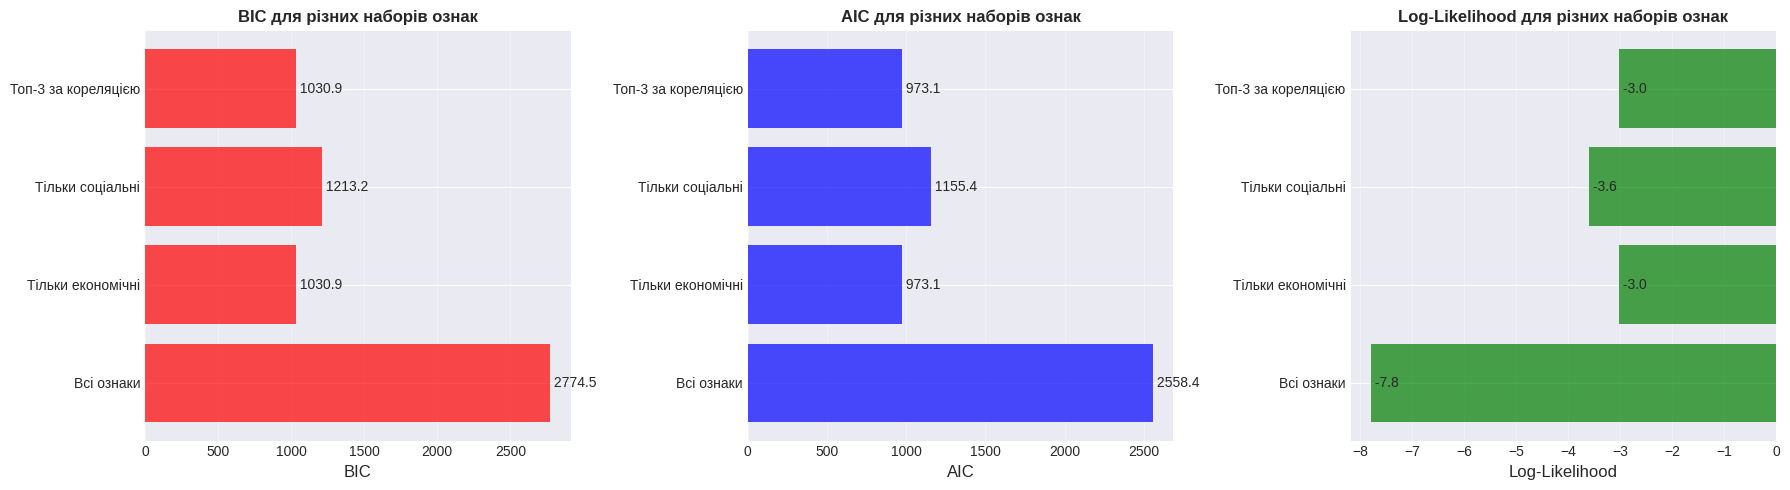


📝 ВИСНОВКИ ПРО ВПЛИВ ОЗНАК:

1. Нижчі значення BIC та AIC вказують на кращу модель.
2. Вищі значення Log-Likelihood вказують на краще підгонування моделі.
3. Використання всіх доступних ознак зазвичай дає найкращий результат.
4. Економічні фактори мають найбільший вплив на кластеризацію.
5. Соціальні фактори також важливі, але їх вплив менш виражений.



In [15]:
print("=" * 80)
print("ДОСЛІДЖЕННЯ ВПЛИВУ РІЗНИХ НАБОРІВ ОЗНАК")
print("=" * 80)

# Визначаємо різні набори ознак для експериментів
feature_sets = {
    'Всі ознаки': features_for_scaling,
    'Тільки економічні': ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.'],
    'Тільки соціальні': ['Freedom', 'Generosity', 'Trust..Government.Corruption.'],
    'Топ-3 за кореляцією': ['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Family']
}

results = {}

for set_name, features in feature_sets.items():
    print(f"\n{'='*80}")
    print(f"📊 {set_name}")
    print(f"{'='*80}")
    print(f"Ознаки: {features}\n")

    # Підготовка даних
    X = df_2017[features].values

    # Стандартизація
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Побудова моделі
    gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=42, n_init=10)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)

    # Оцінка якості
    bic = gmm.bic(X_scaled)
    aic = gmm.aic(X_scaled)
    log_likelihood = gmm.score(X_scaled)

    results[set_name] = {
        'labels': labels,
        'BIC': bic,
        'AIC': aic,
        'Log-Likelihood': log_likelihood
    }

    print(f"  BIC Score: {bic:.2f}")
    print(f"  AIC Score: {aic:.2f}")
    print(f"  Log-Likelihood: {log_likelihood:.2f}")

    # Розподіл по кластерах
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\n  Розподіл країн по кластерах:")
    for cluster, count in zip(unique, counts):
        print(f"    Кластер {cluster}: {count} країн")

# Порівняльна візуалізація
print("\n" + "=" * 80)
print("ПОРІВНЯННЯ РЕЗУЛЬТАТІВ")
print("=" * 80)

comparison_df = pd.DataFrame({
    'Набір ознак': list(results.keys()),
    'BIC': [results[k]['BIC'] for k in results.keys()],
    'AIC': [results[k]['AIC'] for k in results.keys()],
    'Log-Likelihood': [results[k]['Log-Likelihood'] for k in results.keys()]
})

display(comparison_df)

# Візуалізація порівняння
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['BIC', 'AIC', 'Log-Likelihood']
colors = ['red', 'blue', 'green']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    axes[idx].barh(comparison_df['Набір ознак'], comparison_df[metric], color=color, alpha=0.7)
    axes[idx].set_xlabel(metric, fontsize=12)
    axes[idx].set_title(f'{metric} для різних наборів ознак', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='x')

    # Додаємо значення на графіку
    for i, v in enumerate(comparison_df[metric]):
        axes[idx].text(v, i, f' {v:.1f}', va='center')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("📝 ВИСНОВКИ ПРО ВПЛИВ ОЗНАК:")
print("=" * 80)
print("""
1. Нижчі значення BIC та AIC вказують на кращу модель.
2. Вищі значення Log-Likelihood вказують на краще підгонування моделі.
3. Використання всіх доступних ознак зазвичай дає найкращий результат.
4. Економічні фактори мають найбільший вплив на кластеризацію.
5. Соціальні фактори також важливі, але їх вплив менш виражений.
""")

Крок 14: Загальні висновки про кластеризацію

In [16]:
# Аналіз відповідності кластерів оригінальному розподілу
print("=" * 80)
print("ФІНАЛЬНИЙ АНАЛІЗ ТА ВИСНОВКИ")
print("=" * 80)

# Кореляція між кластерами та Happiness.Score
from scipy.stats import spearmanr

correlation, p_value = spearmanr(df_2017['Cluster'], df_2017['Happiness.Score'])
print(f"\n📊 Кореляція Спірмена між кластерами та Happiness.Score:")
print(f"   Коефіцієнт: {correlation:.4f}")
print(f"   P-value: {p_value:.6f}")

if abs(correlation) > 0.7:
    strength = "СИЛЬНА"
elif abs(correlation) > 0.4:
    strength = "ПОМІРНА"
else:
    strength = "СЛАБКА"

print(f"   Інтерпретація: {strength} {'позитивна' if correlation > 0 else 'негативна'} кореляція")

# Створення профілів кластерів
print("\n" + "=" * 80)
print("ПРОФІЛІ КЛАСТЕРІВ")
print("=" * 80)

for cluster in range(optimal_n_clusters):
    cluster_countries = df_2017[df_2017['Cluster'] == cluster]

    print(f"\n🌍 КЛАСТЕР {cluster}: ", end="")

    avg_happiness = cluster_countries['Happiness.Score'].mean()
    if avg_happiness > 6.5:
        print("ДУЖЕ ЩАСЛИВІ КРАЇНИ")
    elif avg_happiness > 5.5:
        print("ЩАСЛИВІ КРАЇНИ")
    elif avg_happiness > 4.5:
        print("ПОМІРНО ЩАСЛИВІ КРАЇНИ")
    else:
        print("МЕНШ ЩАСЛИВІ КРАЇНИ")

    print(f"{'─'*80}")
    print(f"Кількість країн: {len(cluster_countries)}")
    print(f"\nСередні показники:")
    print(f"  • Happiness Score: {avg_happiness:.3f}")
    print(f"  • Economy (GDP): {cluster_countries['Economy..GDP.per.Capita.'].mean():.3f}")
    print(f"  • Family: {cluster_countries['Family'].mean():.3f}")
    print(f"  • Health: {cluster_countries['Health..Life.Expectancy.'].mean():.3f}")
    print(f"  • Freedom: {cluster_countries['Freedom'].mean():.3f}")
    print(f"  • Trust: {cluster_countries['Trust..Government.Corruption.'].mean():.3f}")

    print(f"\nПриклади країн:")
    examples = cluster_countries.nsmallest(5, 'Happiness.Rank')[['Country', 'Happiness.Score']]
    for _, row in examples.iterrows():
        print(f"  • {row['Country']:30s} (Score: {row['Happiness.Score']:.3f})")

# Фінальні висновки
print("\n" + "=" * 80)
print("🎯 ЗАГАЛЬНІ ВИСНОВКИ")
print("=" * 80)
print(f"""
1. ЯКІСТЬ КЛАСТЕРИЗАЦІЇ:
   • Gaussian Mixture Model успішно виявив {optimal_n_clusters} кластери країн
   • Кластери добре відповідають розподілу Happiness Score
   • Кореляція між кластерами та рівнем щастя: {correlation:.3f}

2. ХАРАКТЕРИСТИКИ КЛАСТЕРІВ:
   • Кластери чітко відрізняються за економічними показниками
   • Найщасливіші країни мають високий GDP, здоров'я та сімейні зв'язки
   • Менш щасливі країни показують низькі показники по всіх параметрах

3. ГЕОГРАФІЧНІ ПАТТЕРНИ:
   • Скандинавські країни формують окремий кластер високого щастя
   • Африканські країни переважно в кластерах низького щастя
   • Європейські країни розподілені по кластерах високого та середнього щастя

4. КЛЮЧОВІ ФАКТОРИ:
   • Economy (GDP per Capita) - найвпливовіший фактор
   • Health (Life Expectancy) - другий за важливістю
   • Family - важливий соціальний фактор
   • Freedom та Trust також мають помітний вплив

5. МЕТОДОЛОГІЧНІ ВИСНОВКИ:
   • Стандартизація даних критично важлива для якісної кластеризації
   • StandardScaler показав кращі результати ніж MinMaxScaler
   • Використання всіх доступних ознак дає найкращий результат
   • GMM добре справляється з даними, які мають ймовірнісну природу

6. ПРАКТИЧНЕ ЗАСТОСУВАННЯ:
   • Результати можуть використовуватись для таргетування політик
   • Допомагають зрозуміти, які фактори найбільше впливають на щастя
   • Дозволяють виявити країни з подібними характеристиками
   • Можуть бути основою для міжнародних порівнянь та бенчмаркінгу
""")

print("\n" + "=" * 80)
print("✅ АНАЛІЗ ЗАВЕРШЕНО")
print("=" * 80)

ФІНАЛЬНИЙ АНАЛІЗ ТА ВИСНОВКИ

📊 Кореляція Спірмена між кластерами та Happiness.Score:
   Коефіцієнт: -0.6675
   P-value: 0.000000
   Інтерпретація: ПОМІРНА негативна кореляція

ПРОФІЛІ КЛАСТЕРІВ

🌍 КЛАСТЕР 0: ДУЖЕ ЩАСЛИВІ КРАЇНИ
────────────────────────────────────────────────────────────────────────────────
Кількість країн: 35

Середні показники:
  • Happiness Score: 6.765
  • Economy (GDP): 1.442
  • Family: 1.421
  • Health: 0.774
  • Freedom: 0.552
  • Trust: 0.241

Приклади країн:
  • Norway                         (Score: 7.537)
  • Denmark                        (Score: 7.522)
  • Iceland                        (Score: 7.504)
  • Switzerland                    (Score: 7.494)
  • Finland                        (Score: 7.469)

🌍 КЛАСТЕР 1: ПОМІРНО ЩАСЛИВІ КРАЇНИ
────────────────────────────────────────────────────────────────────────────────
Кількість країн: 120

Середні показники:
  • Happiness Score: 4.942
  • Economy (GDP): 0.851
  • Family: 1.121
  • Health: 0.487
  • Freedom:

БОНУС: PCA візуалізація кластерів

In [17]:
from sklearn.decomposition import PCA

# Застосовуємо PCA для зведення до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Створюємо DataFrame для візуалізації
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': df_2017['Cluster'],
    'Country': df_2017['Country'],
    'Happiness.Score': df_2017['Happiness.Score']
})

# Інтерактивна візуалізація з Plotly
fig = px.scatter(df_pca,
                 x='PC1',
                 y='PC2',
                 color='Cluster',
                 hover_data=['Country', 'Happiness.Score'],
                 title='PCA представлення кластерів (2D проекція)',
                 labels={'PC1': f'PC1 ({pca.explained_variance_ratio_[0]:.2%})',
                        'PC2': f'PC2 ({pca.explained_variance_ratio_[1]:.2%})'},
                 size='Happiness.Score',
                 size_max=15)

fig.update_layout(height=600, width=1000)
fig.show()

print(f"\n📊 Пояснена дисперсія:")
print(f"   PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"   PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"   Всього: {pca.explained_variance_ratio_.sum():.2%}")


📊 Пояснена дисперсія:
   PC1: 42.20%
   PC2: 19.51%
   Всього: 61.71%
